In [123]:
#Hector and Sid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
training = pd.read_csv('hw4data/train.csv')
validation = pd.read_csv('hw4data/valid.csv')
testing = pd.read_csv('hw4data/test.csv')

In [125]:
def localWeights(X, X_i, T):
    a = np.diag(np.exp((-(X-X_i[:])**2)/(2 * T**2)))
    return a

In [ ]:
def getLocalWeight(X, y, W):
    w = np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(y)
    w = w.round(2)
    return w

In [ ]:
def weightedRegression(X_i, Y, T):
    X1 = np.ones(shape=[len(X_i)])
    X = np.stack([X_i,X1]).T
    Y_ = []

    for x in X:
        W = localWeights(x[0], X_i, T)
        w = getLocalWeight(X, Y, W)
        Y_.append(x@w)

    return Y_

In [128]:
y = weightedRegression(training['x_1'], training['y'], 0.5)
MSE_train = np.dot(training['y'] - y, training['y'] - y)/len(training['y'])
MSE_train

0.3246719070098074

In [129]:
y_v = weightedRegression(validation['x_1'], validation['y'], 0.5)
MSE_valid = np.dot(validation['y'] - y_v, validation['y'] - y_v)/len(validation['y'])
MSE_valid

0.3160539433413954

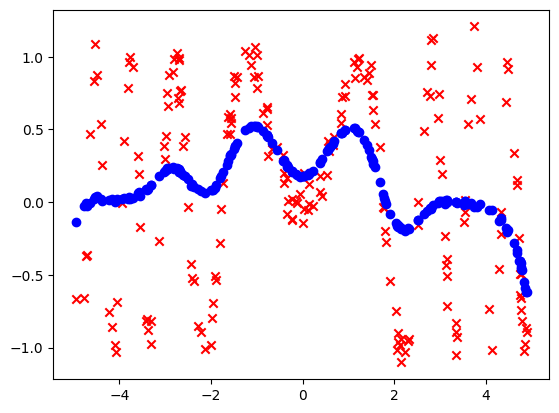

In [130]:
plt.scatter(validation['x_1'], validation['y'], marker = 'x', c = 'red')
plt.scatter(validation['x_1'], y_v, marker = 'o', c = 'blue')
plt.show()

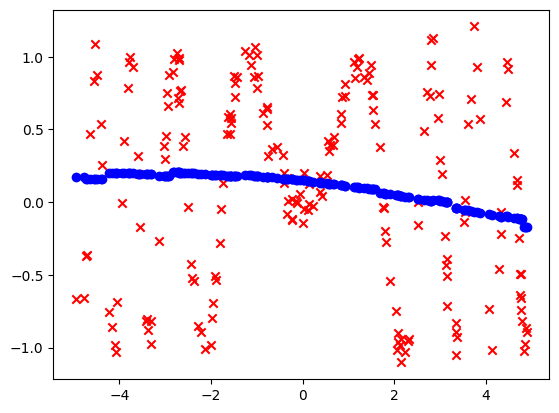

0.4212766552142499


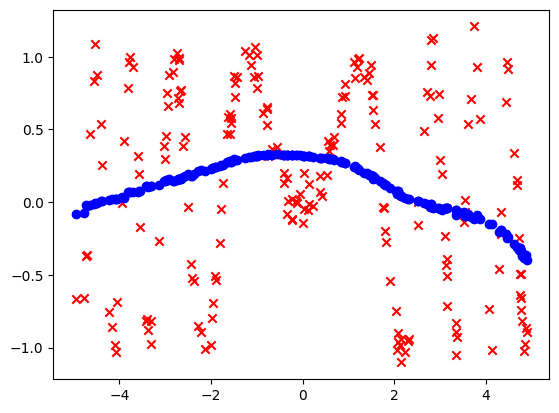

0.3954283383012583


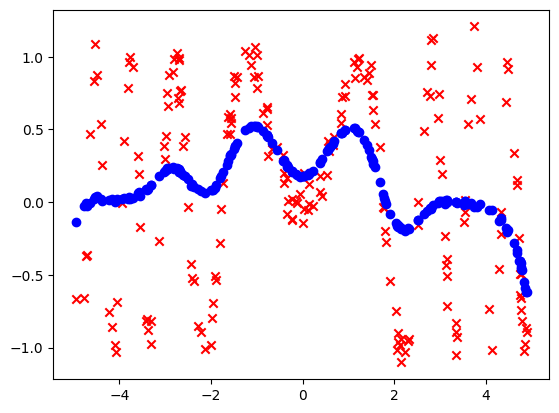

0.3160539433413954


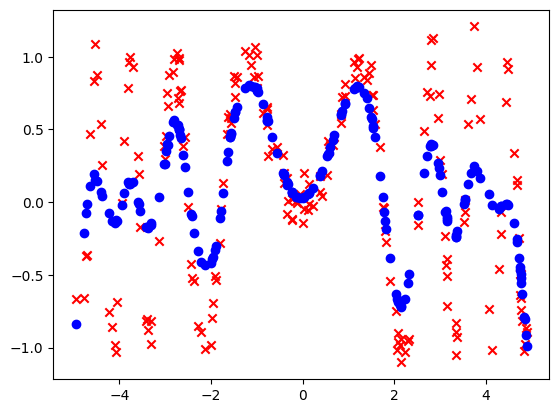

0.14455426720937387


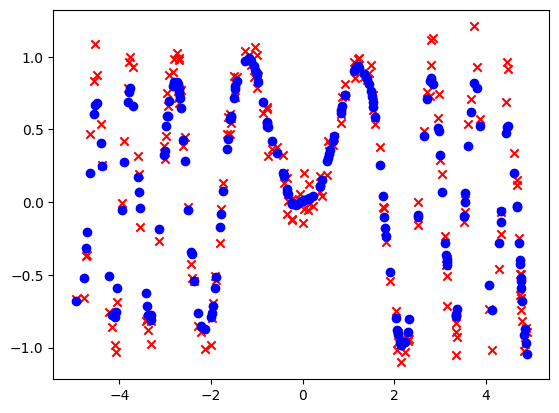

0.017558588429964595


In [131]:
for i in [5, 1, 0.5, 0.25, 0.1]:
    y_v = weightedRegression(validation['x_1'], validation['y'], i)
    plt.scatter(validation['x_1'], validation['y'], marker = 'x', c = 'red')
    plt.scatter(validation['x_1'], y_v, marker = 'o', c = 'blue')
    plt.show()
    MSE_valid = np.dot(validation['y'] - y_v, validation['y'] - y_v)/len(validation['y'])
    print(MSE_valid)

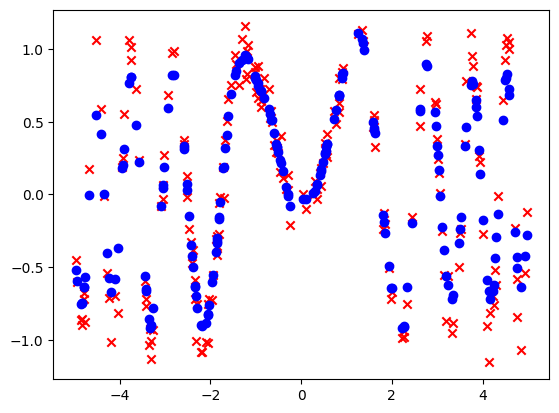

0.021170311202537297


In [132]:
y_t = weightedRegression(testing['x_1'], testing['y'], 0.1)
plt.scatter(testing['x_1'], testing['y'], marker = 'x', c = 'red')
plt.scatter(testing['x_1'], y_t, marker = 'o', c = 'blue')
plt.show()
MSE_test = np.dot(testing['y'] - y_t, testing['y'] - y_t)/len(testing['y'])
print(MSE_test)